<font size="5"> Solution to 5 </font>

<font size="5"> (i) </font>

The choice of the weight matrix $W$ is as follows: let the diagonal be $0.5 w^{(i)}$ and off-diagonal entries be 0. 

Then the $i$ th entry of the column vector $W(X \theta - y)$ is $\sum_{j} W_{ij}(X \theta - y)_j = 0.5 w^{(i)} \theta^T x^{(i)} - y^{(i)}$. 

Then $(X \theta - y)^T W(X \theta - y) = \sum_{i=1}^m (\theta^{T}x^{(i)} - y^{(i)})(0.5w^{(i)}\theta^T x^{(i)} - y^{(i)}) = 0.5 \sum_{i=1}^m w^{(i)} (\theta^T x^{(i)} - y^{(i)})^2$.



<font size="5"> (ii) </font>

A result from problem set 0 (or can be seen from the Matrix Cookbook) is that $\nabla_y y^TAy = 2Ay$. Also, $\nabla_y Ay = A$.

$\nabla_\theta (X \theta - y)^T W(X \theta - y) = 2X^T W (X \theta - y) = 2X^T W X \theta - 2W X^T y$.

Setting this equation to $0$ and solving for $\theta$ gives $\theta = (X^T W X)^{-1} X^T W y$.

<font size="5"> (iii) </font>

The maximum likelihood estimate for $\theta$ can be found from maximising the log-likelihood function:

\begin{align*}
\ell(\theta) &= \sum_{i=1}^m \log p(y^{(i)} \mid x^{(i)} ; \theta) \\
    &= \sum_{i=1}^m \log \frac{1}{\sqrt{2 \pi } \sigma^{(i)}} \exp \left( -\frac{(y^{(i)} - \theta^T x^{(i)})^2}{2 (\sigma^{(i)})^2} \right) \\
    &= \sum_{i=1}^m \log \frac{1}{\sqrt{2 \pi } \sigma^{(i)}} - \frac{(y^{(i)} - \theta^T x^{(i)})^2}{2 (\sigma^{(i)})^2} \\
\end{align*}

Note that the term $\log \frac{1}{\sqrt{2 \pi } \sigma^{(i)}}$ is a constant and does not depend on $\theta$, hence the optimisation problem is really about maximising the following function:

\begin{align*}
J(\theta) &= \sum_{i=1}^m -\frac{(y^{(i)} - \theta^T x^{(i)})^2}{2 (\sigma^{(i)})^2} \\
    &= \frac{1}{2} \sum_{i=1}^m \frac{-1}{(\sigma ^{(i)})^2} (y^{(i)} - \theta^T x^{(i)})^2. 
\end{align*}

This is indeed the weighted linear regression problem with $w^{(i)} = -1 / (\sigma^{(i)})^2$.

<font size="5"> Solution to 5(b) </font>

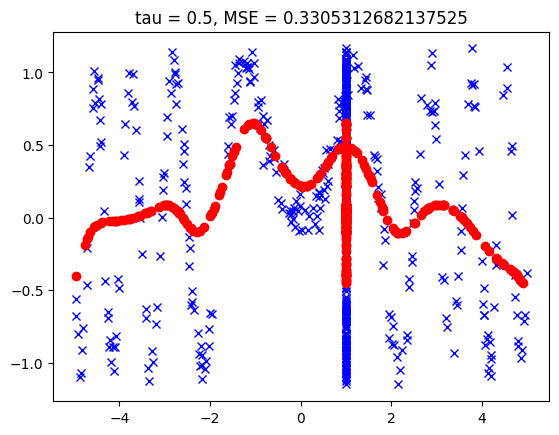

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import util

from linear_model import LinearModel

# Solution to 5(b)

def main(tau, train_path, eval_path):
    """Problem 5(b): Locally weighted regression (LWR)

    Args:
        tau: Bandwidth parameter for LWR.
        train_path: Path to CSV file containing dataset for training.
        eval_path: Path to CSV file containing dataset for evaluation.
    """
    # Load training set
    x_train, y_train = util.load_dataset(train_path, add_intercept=True)

    # *** START CODE HERE ***
    # Fit a LWR model
    # Get MSE value on the validation set
    # Plot validation predictions on top of training set
    # No need to save predictions
    # Plot data

    # Instantiate a LWR model and fit
    clf = LocallyWeightedLinearRegression(tau)
    clf.fit(x_train, y_train)

    # Load validation set
    x_val, y_val = util.load_dataset(eval_path, add_intercept=True)

    # Get MSE value on the validation set
    y_pred = clf.predict(x_val)
    mse = np.mean((y_pred - y_val) ** 2)

    # Plot validation predictions on top of training set
    plt.figure()
    plt.plot(x_train, y_train, 'bx', linewidth=2)
    plt.plot(x_val, y_pred, 'ro', linewidth=2)
    plt.title(f"tau = {tau}, MSE = {mse}")

    # *** END CODE HERE ***


class LocallyWeightedLinearRegression(LinearModel):
    """Locally Weighted Regression (LWR).

    Example usage:
        > clf = LocallyWeightedLinearRegression(tau)
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def __init__(self, tau):
        super(LocallyWeightedLinearRegression, self).__init__()
        self.tau = tau
        self.x = None
        self.y = None

    def fit(self, x, y):
        """Fit LWR by saving the training set.

        """
        # *** START CODE HERE ***

        # Save the training set in memory 
        self.x = x
        self.y = y

        # *** END CODE HERE ***

    def predict(self, x):
        """Make predictions given inputs x.

        Args:
            x: Inputs of shape (m, n).

        Returns:
            Outputs of shape (m,).
        """
        # *** START CODE HERE ***


        # Calculate the weight matrix W
        m, n = x.shape
        y_pred = np.zeros(m)

        for i in range(m):
            # Returns a vector of the distances between x[i] and each point in self.x
            distances = np.sum((self.x - x[i]) ** 2, axis=1)
            # Calculate the weight matrix W, closer points in self.x will be given higher weights
            W = np.diag(np.exp(-distances / (2 * self.tau ** 2)))
            # Calculate theta using the formula theta = (X^T W X)^-1 X^T W y
            theta = np.linalg.inv(self.x.T @ W @ self.x) @ self.x.T @ W @ self.y
            y_pred[i] = x[i] @ theta
        return y_pred

        # *** END CODE HERE ***

if __name__ == '__main__':
    main(0.5, '../data/ds5_train.csv', '../data/ds5_valid.csv')

<font size="5"> Solution to 5(c) </font>

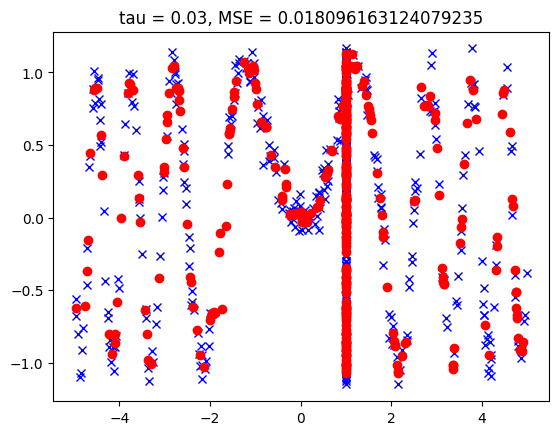

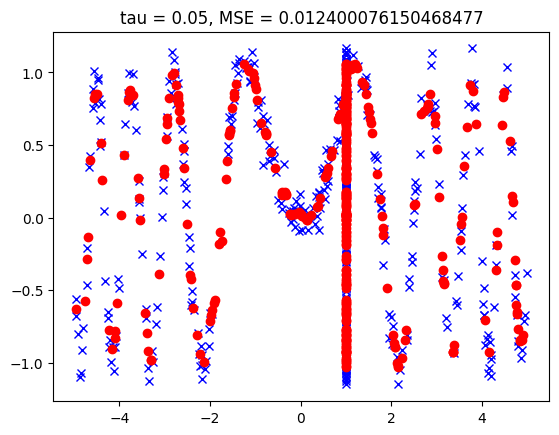

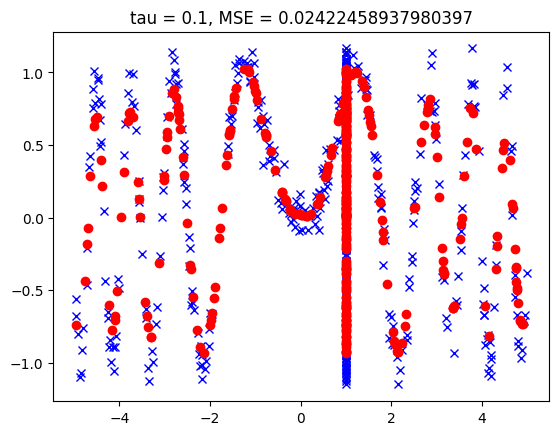

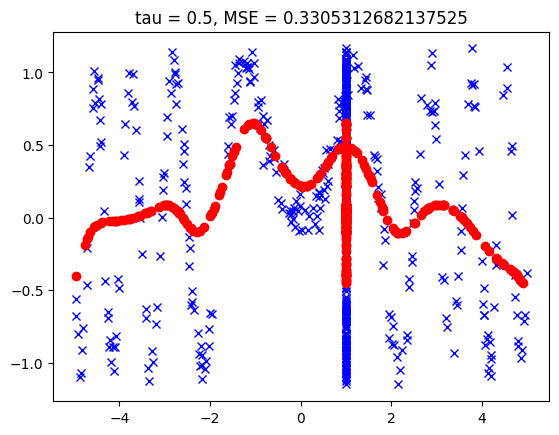

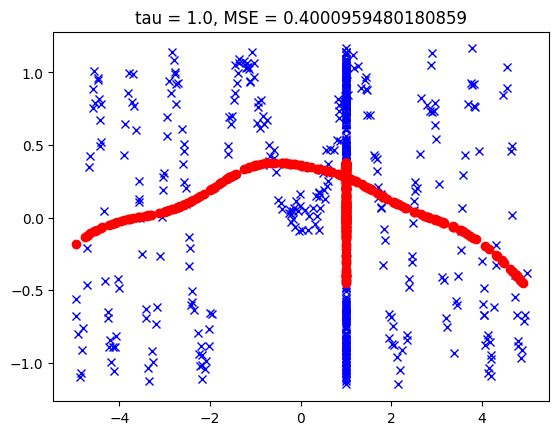

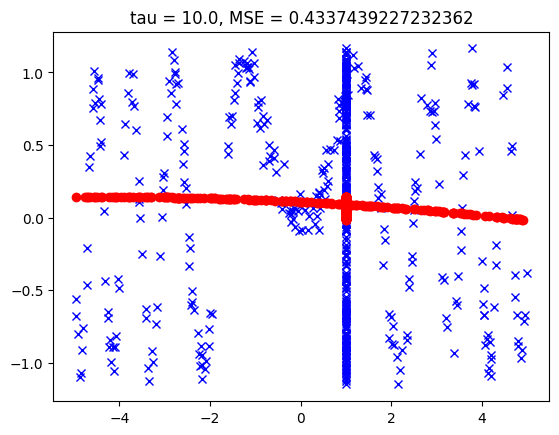

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import util

# Solution to 5(c)

def main(tau_values, train_path, valid_path):
    """Problem 5(c): Tune the bandwidth paramater tau for LWR.

    Args:
        tau_values: List of tau values to try.
        train_path: Path to CSV file containing training set.
        valid_path: Path to CSV file containing validation set.
        test_path: Path to CSV file containing test set.
        pred_path: Path to save predictions.
    """
    # Load training set
    x_train, y_train = util.load_dataset(train_path, add_intercept=True)

    # *** START CODE HERE ***
    # Search tau_values for the best tau (lowest MSE on the validation set)
    # Fit a LWR model with the best tau value
    # Run on the test set to get the MSE value
    # Save predictions to pred_path
    # Plot data

    # Load validation set
    x_val, y_val = util.load_dataset(valid_path, add_intercept=True)

    for tau in tau_values:
        # Create model and fit to training data
        clf = LocallyWeightedLinearRegression(tau)
        # Fit model to training data
        clf.fit(x_train, y_train)

        # Make prediction on validation set
        y_pred = clf.predict(x_val)
        # Find mse of prediction
        mse = np.mean((y_pred - y_val) ** 2)

        # Plot validation predictions on top of training set
        plt.figure()
        plt.plot(x_train, y_train, 'bx', linewidth=2)
        plt.plot(x_val, y_pred, 'ro', linewidth=2)
        plt.title(f"tau = {tau}, MSE = {mse}")

    # *** END CODE HERE ***

if __name__ == '__main__':
    main([3e-2, 5e-2, 1e-1, 5e-1, 1e0, 1e1], '../data/ds5_train.csv', '../data/ds5_valid.csv')


In the above, we see that the best tau value is 0.05, which achieves MSE of 0.0124. Now we will use the cell below to check the MSE on the test set.

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import util

# MSE on test set for problem 5(c)

def main(tau, train_path, valid_path, test_path, pred_path):
    # Load training set
    x_train, y_train = util.load_dataset(train_path, add_intercept=True)

    # Load validation set
    x_test, y_test = util.load_dataset(test_path, add_intercept=True)

    # Instantiate a LWR model and fit
    clf = LocallyWeightedLinearRegression(tau)
    clf.fit(x_train, y_train)

    # Get MSE value on the validation set
    y_pred = clf.predict(x_test)
    mse = np.mean((y_test - y_pred) ** 2)

    # Print MSE value
    print(mse)

    # Save predictions to pred_path
    np.savetxt(pred_path, y_pred)

    # *** END CODE HERE ***

if __name__ == '__main__':
    main(5e-2, '../data/ds5_train.csv', '../data/ds5_valid.csv', '../data/ds5_test.csv', './output/5c_pred.txt')

0.016990143386890092
